<a href="https://colab.research.google.com/github/divolitmosesyo/analysisproject/blob/main/SentiWordNetMNBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Input Data**

In [1]:
!pip install nltk
!pip install Sastrawi
!pip install googletrans==3.1.0a0
!pip install swifter
!pip install WordCloud
!pip install contractions
!pip install emoji
!pip install collections

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=f414a44a0e10d4087161d33fa58f29652fe905c7bd2ee6e0b6a84a8f9ab1648f
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting unin

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
import re
import emoji
nltk.download('punkt')

#load data
df = pd.read_excel("filtered_data_trialrun.xlsx")
def sentence_count(text):
  text = re.sub(r'\.+', ".", text)
  text = re.sub(r'\!', "!", text)
  text = re.sub(r'\?+', "?", text)
  text = emoji.replace_emoji(text)
  text = re.sub('http[^\s]+','',str(text))
  text = text.replace('syg! tw/korea/', '')
  text = sent_tokenize(text)
  return len(text)

df['sentence_count'] = df['text'].apply(sentence_count)
pd.DataFrame([df['created_at'],df['text'],df['sentence_count']]).transpose().head(1000)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,created_at,text,sentence_count
0,2021-08-30 02:54:18,Oohhh jadi model scarlett nya si joongki??? Ma...,2
1,2021-08-30 02:56:55,Tuj kan bener Scarlett whitening feat joongki 🤣🤣🤣,1
2,2021-08-30 03:11:36,wkwk jgn2 beneran joongki ba scarlett https://...,1
3,2021-08-30 03:18:42,Jadi Song Joongki yang bakal jadi BA Scarlett?...,1
4,2021-08-30 03:26:04,oh jadi joong ki mau jadi BA Scarlett 😭 sungke...,1
...,...,...,...
995,2021-10-04 12:24:50.000Z,Produk hits yg blom pernah aku coba: scarlett ...,3
996,2021-10-04 15:59:08.000Z,hah joongki ba scarlett?â€¦\n12,1
997,2021-10-04 16:32:17.000Z,Lihat joongki jadi star ambassadornya scarlett...,2
998,2021-10-06 14:34:17.000Z,"tbtb kepikiran shena selca sama song jong ki, ...",1


### **Preprocessing Data**

#### 1. Cleansing

In [3]:
import re

def clean_tweets(text):
    res = []
    text = re.sub(r'\.+', ".", text)
    text = re.sub(r'\!+', "!", text)
    text = re.sub(r'\?+', "?", text)
    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    text = re.sub('http[^\s]+','',str(text))
    sentences = sent_tokenize(text)
    for text in sentences:
      text =  re.sub("(&amp)"," ", text)
      #remove @
      text = re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text)
      #remove RT sign in the beginning of the tweets
      text = re.sub(r':', '', text)
      text = re.sub(r'‚Ä¶', '', text)
      # remove URL
      text = re.sub('http[^\s]+','',str(text))
      # remove tab, new line, and back slice
      text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
      #replace consecutive non-ASCII characters with a space
      text = re.sub(r'[^\x00-\x7F]+',' ', text)
      #remove punctuation manually
      text = re.sub('[^a-zA-Z]', ' ', text)
      #remove tags
      text = re.sub("&lt;/?.*?&gt;","&lt;&gt;", text)
      #remove digits and special chars
      text = re.sub("(\\d|\\W)+"," ", text)
      #remove other symbol from tweet
      text = re.sub(r'â', '', text)
      text = re.sub(r'€', '', text)
      text = re.sub(r'¦', '', text)
      # remove whitespace leading and trailing
      text = text.strip()
      # remove multiple whitespace into single whitespace
      text = re.sub('\s+',' ',text)
      # remove single character
      text = re.sub(r"\b[a-zA-Z]\b", "", text)
      res.append(text)
    return res

df['clean_text'] = df['text'].apply(clean_tweets)
print('Cleansing Result :')
pd.DataFrame([df['text'],df['clean_text']]).transpose().head(10)

Cleansing Result :


,text,clean_text
0,Oohhh jadi model scarlett nya si joongki??? Ma...,"[Oohhh jadi model scarlett nya si joongki, Man..."
1,Tuj kan bener Scarlett whitening feat joongki 🤣🤣🤣,[Tuj kan bener Scarlett whitening feat joongki]
2,wkwk jgn2 beneran joongki ba scarlett https://...,[wkwk jgn beneran joongki ba scarlett]
3,Jadi Song Joongki yang bakal jadi BA Scarlett?...,[Jadi Song Joongki yang bakal jadi BA Scarlett]
4,oh jadi joong ki mau jadi BA Scarlett 😭 sungke...,[oh jadi joong ki mau jadi BA Scarlett sungkem...
5,song joong ki mau jadi ambassador scarlett??,[song joong ki mau jadi ambassador scarlett]
6,@akudindinya apakah joongki akan menjadi model...,[apakah joongki akan menjadi model scarlett]
7,Jangan² rumor BA idol korea buat scarlett adal...,[Jangan rumor BA idol korea buat scarlett adal...
8,Joongki BA Scarlett? Jadi ngebayangin ntar bik...,"[Joongki BA Scarlett, Jadi ngebayangin ntar bi..."
9,Kayak nya song Joong ki ini mah yang jadi BA S...,[Kayak nya song Joong ki ini mah yang jadi BA ...


#### 2. Case Folding

In [4]:
#lower case---
def case_folding(text):
  return [sentences.casefold() for sentences in text]

df['case_folding'] = df['clean_text'].apply(case_folding)
print('Case Folding Result :')
pd.DataFrame([df['clean_text'],df['case_folding']]).transpose().head(13)

Case Folding Result :


,clean_text,case_folding
0,"[Oohhh jadi model scarlett nya si joongki, Man...","[oohhh jadi model scarlett nya si joongki, man..."
1,[Tuj kan bener Scarlett whitening feat joongki],[tuj kan bener scarlett whitening feat joongki]
2,[wkwk jgn beneran joongki ba scarlett],[wkwk jgn beneran joongki ba scarlett]
3,[Jadi Song Joongki yang bakal jadi BA Scarlett],[jadi song joongki yang bakal jadi ba scarlett]
4,[oh jadi joong ki mau jadi BA Scarlett sungkem...,[oh jadi joong ki mau jadi ba scarlett sungkem...
5,[song joong ki mau jadi ambassador scarlett],[song joong ki mau jadi ambassador scarlett]
6,[apakah joongki akan menjadi model scarlett],[apakah joongki akan menjadi model scarlett]
7,[Jangan rumor BA idol korea buat scarlett adal...,[jangan rumor ba idol korea buat scarlett adal...
8,"[Joongki BA Scarlett, Jadi ngebayangin ntar bi...","[joongki ba scarlett, jadi ngebayangin ntar bi..."
9,[Kayak nya song Joong ki ini mah yang jadi BA ...,[kayak nya song joong ki ini mah yang jadi ba ...


#### 3. Normalizing

In [5]:
slangword = pd.read_excel("kamus-salsabila_ujicoba2.xlsx")
slangword_dict = dict(zip(slangword['before'], slangword['after']))

def normalizing(text):
    result = []
    res = []
    sentences = [sentence.split() for sentence in text]
    for sen in sentences:
      for i, word in enumerate(sen) :
        if word in slangword_dict.keys():
          sen[i] = slangword_dict[word]
      result.append(' '.join(sen))
    res.extend(result)
    return res

df['normalized'] = df['case_folding'].apply(normalizing)
pd.DataFrame([df['case_folding'],df['normalized']]).transpose().head(1000)

,case_folding,normalized
0,"[oohhh jadi model scarlett nya si joongki, man...","[oh jadi model scarlett nya sih joongki, hebat..."
1,[tuj kan bener scarlett whitening feat joongki],[itu kan betul scarlett whitening menampilkan ...
2,[wkwk jgn beneran joongki ba scarlett],[tertawa jangan betulan joongki brand ambassad...
3,[jadi song joongki yang bakal jadi ba scarlett],[jadi song joongki yang bakal jadi brand ambas...
4,[oh jadi joong ki mau jadi ba scarlett sungkem...,[oh jadi joongki ki mau jadi brand ambassador ...
...,...,...
995,[produk hits yg blom pernah aku coba scarlett ...,[produk hits yang belum pernah aku coba scarle...
996,"[hah joongki ba scarlett, ]","[hah joongki brand ambassador scarlett, ]"
997,[lihat joongki jadi star ambassadornya scarlet...,[lihat joongki jadi star ambassador nya scarle...
998,[tbtb kepikiran shena selca sama song jong ki ...,[tiba tiba terpikirkan shena self camera denga...


#### 4. Tokenizing

In [6]:
from nltk.tokenize import word_tokenize

#Tokenize the sentences
def word_tokenize_wrapper(text):
    return [word_tokenize(sentence) for sentence in text]

df['tokenized'] = df['normalized'].apply(word_tokenize_wrapper)
print('Tokenizing Result :')
pd.DataFrame([df['normalized'],df['tokenized']]).transpose().head(10)

Tokenizing Result :


,normalized,tokenized
0,"[oh jadi model scarlett nya sih joongki, hebat...","[[oh, jadi, model, scarlett, nya, sih, joongki..."
1,[itu kan betul scarlett whitening menampilkan ...,"[[itu, kan, betul, scarlett, whitening, menamp..."
2,[tertawa jangan betulan joongki brand ambassad...,"[[tertawa, jangan, betulan, joongki, brand, am..."
3,[jadi song joongki yang bakal jadi brand ambas...,"[[jadi, song, joongki, yang, bakal, jadi, bran..."
4,[oh jadi joongki ki mau jadi brand ambassador ...,"[[oh, jadi, joongki, ki, mau, jadi, brand, amb..."
5,[song joongki ki mau jadi ambassador scarlett],"[[song, joongki, ki, mau, jadi, ambassador, sc..."
6,[apakah joongki akan menjadi model scarlett],"[[apakah, joongki, akan, menjadi, model, scarl..."
7,[jangan rumor brand ambassador idola korea unt...,"[[jangan, rumor, brand, ambassador, idola, kor..."
8,"[joongki brand ambassador scarlett, jadi memba...","[[joongki, brand, ambassador, scarlett], [jadi..."
9,[seperti nya song joongki ki ini mah yang jadi...,"[[seperti, nya, song, joongki, ki, ini, mah, y..."


#### 5. Filtering

In [7]:
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['kalau','kan','kah','nah','meng','nih','hmm','nya','woy','sih','guys','my','cuy','deh','dah','mah','heh','hah','hey','beh','si','dong','oh','lah','loh','ih','eh','ah','kok','waduh','an','wah','wow','aduh','yah','wih','weh','uu','oalah','elah','nge','huhu','ululululuuu','asdfghj','shhsgehjsjs','absjsjbsjsnsnsks','sjdbslsbsjalmazhslabskl','mgdlgdlydlgdoydotdkfdjteid','abwjnsjsnsjwj','mem','asdfjkl','kdm','nwxksksnuskdiel','num','hueeee','ajakahfsgabakjdhsh','per','huhuhu','hmmm','xixixi','mbin','bunda','yuhu','akshsjfhuejdgsjagajdud','asksksks','beuh','ehm','sjsjsjjs','sksksk','sksksks','woohoo','cih','doang','hai','haseyo','of','psg','ie','ter','wt','ki','duh','x']
all_stopwords = stop_factory+more_stopword
all_stopwords.remove('tidak')
all_stopwords.remove('bisa')
all_stopwords.remove('belum')
all_stopwords.remove('masih')
all_stopwords.remove('dapat')
dictionary = ArrayDictionary(all_stopwords)
str_dict = StopWordRemover(dictionary)

def stopwords_sastrawi(texts):
  result = []
  for sentence in texts:
    filter = [word for word in sentence if word not in all_stopwords]
    result.append(filter)
  return result

df['filtered'] = df['tokenized'].apply(stopwords_sastrawi)

print('Filtering Sastrawi Result :')
pd.DataFrame([df['tokenized'],df['filtered']]).transpose().head(10)

Filtering Sastrawi Result :


,tokenized,filtered
0,"[[oh, jadi, model, scarlett, nya, sih, joongki...","[[jadi, model, scarlett, joongki], [hebat, bet..."
1,"[[itu, kan, betul, scarlett, whitening, menamp...","[[betul, scarlett, whitening, menampilkan, joo..."
2,"[[tertawa, jangan, betulan, joongki, brand, am...","[[tertawa, jangan, betulan, joongki, brand, am..."
3,"[[jadi, song, joongki, yang, bakal, jadi, bran...","[[jadi, song, joongki, bakal, jadi, brand, amb..."
4,"[[oh, jadi, joongki, ki, mau, jadi, brand, amb...","[[jadi, joongki, mau, jadi, brand, ambassador,..."
5,"[[song, joongki, ki, mau, jadi, ambassador, sc...","[[song, joongki, mau, jadi, ambassador, scarle..."
6,"[[apakah, joongki, akan, menjadi, model, scarl...","[[joongki, menjadi, model, scarlett]]"
7,"[[jangan, rumor, brand, ambassador, idola, kor...","[[jangan, rumor, brand, ambassador, idola, kor..."
8,"[[joongki, brand, ambassador, scarlett], [jadi...","[[joongki, brand, ambassador, scarlett], [jadi..."
9,"[[seperti, nya, song, joongki, ki, ini, mah, y...","[[song, joongki, jadi, brand, ambassador, scar..."


#### 6. Stemming

In [8]:
import swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['filtered']:
    for sentence in document:
      for term in sentence:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

# apply stemmed term to dataframe
def get_stemmed_term(document):
  result = []
  for sentence in document:
    stemming = [term_dict[term] for term in sentence]
    result.append(stemming)
  return result

df['text_stemmed'] = df['filtered'].swifter.apply(get_stemmed_term)
print('Stemming Sastrawi Result :')
pd.DataFrame([df['filtered'],df['text_stemmed']]).transpose().head(10)

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Stemming Sastrawi Result :


,filtered,text_stemmed
0,"[[jadi, model, scarlett, joongki], [hebat, bet...","[[jadi, model, scarlett, joongki], [hebat, bet..."
1,"[[betul, scarlett, whitening, menampilkan, joo...","[[betul, scarlett, whitening, tampil, joongki]]"
2,"[[tertawa, jangan, betulan, joongki, brand, am...","[[tertawa, jangan, betul, joongki, brand, amba..."
3,"[[jadi, song, joongki, bakal, jadi, brand, amb...","[[jadi, song, joongki, bakal, jadi, brand, amb..."
4,"[[jadi, joongki, mau, jadi, brand, ambassador,...","[[jadi, joongki, mau, jadi, brand, ambassador,..."
5,"[[song, joongki, mau, jadi, ambassador, scarle...","[[song, joongki, mau, jadi, ambassador, scarle..."
6,"[[joongki, menjadi, model, scarlett]]","[[joongki, jadi, model, scarlett]]"
7,"[[jangan, rumor, brand, ambassador, idola, kor...","[[jangan, rumor, brand, ambassador, idola, kor..."
8,"[[joongki, brand, ambassador, scarlett], [jadi...","[[joongki, brand, ambassador, scarlett], [jadi..."
9,"[[song, joongki, jadi, brand, ambassador, scar...","[[song, joongki, jadi, brand, ambassador, scar..."


#### Simpan hasil
Sintaks di bawah ditujukan untuk menyimpan hasil dari setiap tahap ke dalam excel.

In [ ]:
all=pd.DataFrame([df['text'],df['clean_text'],df['case_folding'],df['normalized'],df['tokenized'],df['filtered'],df['text_stemmed']]).transpose().head(1000)
all.to_excel("preprocessing was done!.xlsx")

#### Visualisasi
Visualisasi hasil *preprocessing* dengan **WordCloud** dan menyimpan hasil

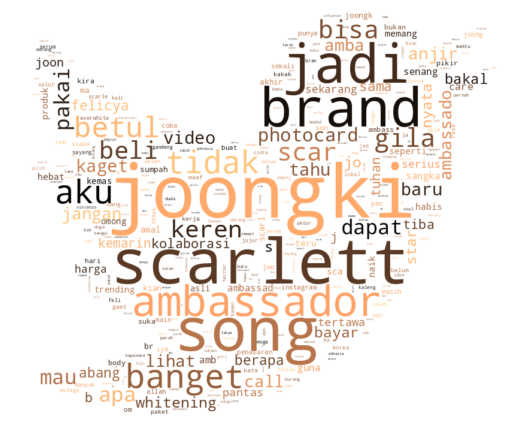

In [ ]:
#Data Visualization----
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
#Make a WordCloud
mask = np.array(Image.open('twitter_hd.png'))
wordcloud = WordCloud(width=mask.shape[1], height=mask.shape[0], background_color="white", mask=mask,
                      colormap='copper', collocations=False, max_words=1000).generate(df['text_stemmed'].to_string())

# create twitter image
plt.figure(figsize=[5,5])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
# store to file
plt.savefig("wordcloud was done.png", format="png")
plt.show()

### **Analisis Data dengan 2 Kombinasi Metode**

Metode Pertama: **Lexicon based Method**

Sintaks di bawah mendeteksi bahasa apa saja yang terdapat dalam tweet (sebelumnya sudah ambil *tweet* berbahasa Indonesia tapi program mendeteksi beberapa bahasa lain selain bahasa Indonesia)

##### ***Lexicon-Based* dengan SentiWordNet**

In [9]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk import pos_tag

###### Terjemah kata
*Translating* data ke dalam Bahasa Inggris

In [10]:
from googletrans import Translator
import nltk
nltk.download('stopwords')
import contractions

translator = Translator()
def translating(text):
  result = []
  result2 = []
  for sentence in text:
    trans = translator.translate(sentence, src='id', dest='en')
    res = [getattr(word, 'text') for word in trans]
    low = [word.lower() for word in res]
    sen = ' '.join(low)
    contracting = contractions.fix(sen)
    spliting = contracting.split()
    result.append(spliting)
  result2.extend(result)
  return result2


df['translate_finish'] = df['text_stemmed'].apply(translating)
print('Translating Result:')
pd.DataFrame([df['text_stemmed'],df['translate_finish']]).transpose().head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Translating Result:


,text_stemmed,translate_finish
0,"[[jadi, model, scarlett, joongki], [hebat, bet...","[[so, model, scarlett, joong, ki], [great, rig..."
1,"[[betul, scarlett, whitening, tampil, joongki]]","[[right, scarlett, whitening, come, on, stage,..."
2,"[[tertawa, jangan, betul, joongki, brand, amba...","[[laugh, do, not, right, joong, ki, brands, am..."
3,"[[jadi, song, joongki, bakal, jadi, brand, amb...","[[so, song, joong, ki, will, so, brands, ambas..."
4,"[[jadi, joongki, mau, jadi, brand, ambassador,...","[[so, joong, ki, want, to, so, brands, ambassa..."
5,"[[song, joongki, mau, jadi, ambassador, scarle...","[[song, joong, ki, want, to, so, ambassador, s..."
6,"[[joongki, jadi, model, scarlett]]","[[joong, ki, so, model, scarlett]]"
7,"[[jangan, rumor, brand, ambassador, idola, kor...","[[do, not, rumors, brands, ambassador, idol, k..."
8,"[[joongki, brand, ambassador, scarlett], [jadi...","[[joong, ki, brands, ambassador, scarlett], [s..."
9,"[[song, joongki, jadi, brand, ambassador, scar...","[[song, joong, ki, so, brands, ambassador, sca..."


###### *POS Tagging* dan Pehitungan Skor Kata

Skor dari setiap kata dalam *tweet*

In [11]:
#Lexicon based with Sentiwordnet----
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('omw-1.4')

def word_sentiment_calculator(word, tag):
    pos_score = 0
    neg_score = 0

    if 'NN' in tag and len(list(swn.senti_synsets(word, 'n')))>0:
        syn_set = list(swn.senti_synsets(word, 'n'))
    elif 'VB' in tag and len(list(swn.senti_synsets(word, 'v')))>0:
        syn_set = list(swn.senti_synsets(word, 'v'))
    elif 'JJ' in tag and len(list(swn.senti_synsets(word, 'a')))>0:
        syn_set = list(swn.senti_synsets(word, 'a'))
    elif 'RB' in tag and len(list(swn.senti_synsets(word, 'r')))>0:
        syn_set = list(swn.senti_synsets(word, 'r'))
    else:
        return (0,0)

    for syn in syn_set:
        pos_score += syn.pos_score()
        neg_score += syn.neg_score()
    return (pos_score/len(syn_set), neg_score/len(syn_set))

def sentence_sentiment_calculator(text):
  score = []
  for sentence in text:
    score1 = []
    pos_tags = nltk.pos_tag(sentence)
    pos_score = 0
    neg_score = 0
    for word, tag in pos_tags:
        pos_score = word_sentiment_calculator(word, tag)[0]
        neg_score = word_sentiment_calculator(word, tag)[1]
        sentiment_score = pos_score-neg_score
        scoring = float(sentiment_score)
        final = round(scoring, 4)
        result = (word, tag, final)
        score1.append(result)
    score.append(score1)
  return score

df['score'] = df['translate_finish'].apply(sentence_sentiment_calculator)
pd.DataFrame([df['score']]).transpose().head(15)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,score
0,"[[(so, RB, 0.0), (model, JJ, 0.625), (scarlett..."
1,"[[(right, JJ, 0.3036), (scarlett, NN, 0.0), (w..."
2,"[[(laugh, RB, 0.0), (do, VBP, -0.0288), (not, ..."
3,"[[(so, RB, 0.0), (song, JJ, 0.0), (joong, NN, ..."
4,"[[(so, RB, 0.0), (joong, JJ, 0.0), (ki, NN, 0...."
5,"[[(song, NN, 0.0), (joong, JJ, 0.0), (ki, NN, ..."
6,"[[(joong, JJ, 0.0), (ki, NNS, 0.125), (so, RB,..."
7,"[[(do, VB, -0.0288), (not, RB, -0.625), (rumor..."
8,"[[(joong, NN, 0.0), (ki, VB, 0.0), (brands, NN..."
9,"[[(song, NN, 0.0), (joong, NN, 0.0), (ki, NN, ..."


###### Hasil Akumulasi Skor Tiap *Tweet*

In [12]:
def score_value(text):
  total_score = []
  score_label = []
  final = []
  totalpos = []
  totalneg = []
  res = []
  pos = 0
  neg = 0
  for sentence in text:
    pos = [float(value) for word, tag, value in sentence if value > 0]
    neg = [float(value) for word, tag, value in sentence if value < 0]
    for word, tag, value in sentence:
      repos = np.divide(sum(pos), len(sentence))
      reneg = np.divide(sum(neg), len(sentence))
      score_label.append([round(repos,4), round(reneg,4)])
      hasil = set(frozenset(x) for x in score_label)
  final.extend([list(x) for x in hasil])

  for sublist in final:
    positive = [value for value in sublist if value > 0]
    negative = [value for value in sublist if value < 0]
    totalpos.extend(positive)
    totalneg.extend(negative)
    hasilpos = round(sum(totalpos),4)
    hasilneg = round(sum(totalneg),4)
  total_score.extend([hasilpos, hasilneg])
  return total_score

df['score_label'] = df['score'].apply(score_value)
df['positif'] = (df['score_label'].apply(lambda x: x[0]))/df['sentence_count']
df['negatif'] = (df['score_label'].apply(lambda x: x[1]))/df['sentence_count']
df['score_label'] = df[['positif', 'negatif']].values.tolist()

pd.DataFrame([df['translate_finish'], df['score_label']]).transpose().head(1000)

,translate_finish,score_label
0,"[[so, model, scarlett, joong, ki], [great, rig...","[0.16745, 0.0]"
1,"[[right, scarlett, whitening, come, on, stage,...","[0.0612, 0.0]"
2,"[[laugh, do, not, right, joong, ki, brands, am...","[0.0162, -0.0726]"
3,"[[so, song, joong, ki, will, so, brands, ambas...","[0.0278, 0.0]"
4,"[[so, joong, ki, want, to, so, brands, ambassa...","[0.0227, -0.0068]"
...,...,...
995,"[[product, hits, not, yet, once, i, try, scarl...","[0.028800000000000003, -0.06246666666666667]"
996,"[[joong, ki, brands, ambassador, scarlett], []]","[0.0167, 0.0]"
997,"[[look, joong, ki, so, star, ambassador, scarl...","[0.0403, -0.0096]"
998,"[[arrive, arrive, think, shena, self, cameras,...","[0.0078, -0.0121]"


###### Label Sentimen dengan **SentiWordnet**

In [13]:
def label(text):
    sentiment = []
    for value in text:
        posScore = [value for value in list(text) if value > 0]
        negScore = [abs(value) for value in list(text) if value < 0]
        if posScore > negScore:
            return 'Positive'
        elif posScore < negScore:
            return 'Negative'
        else:
            return 'Neutral'
    return sentiment

df['label_sentimen'] = df['score_label'].apply(label)
pd.DataFrame([df['label_sentimen']]).transpose().head(10)

,label_sentimen
0,Positive
1,Positive
2,Negative
3,Positive
4,Positive
5,Positive
6,Positive
7,Negative
8,Positive
9,Positive


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('label_sentimen').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Hasil Akhir Pelabelan *Lexicon-Based* dengan **SentiWordNet**

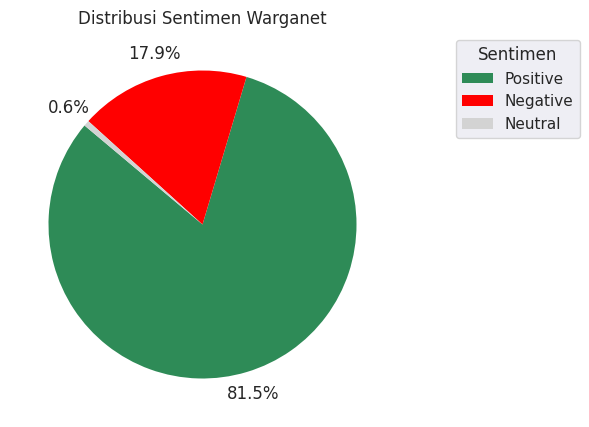

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

count_class=pd.value_counts(df["label_sentimen"], sort= True)
colors = ['seagreen','red','lightgrey']
plt.figure(figsize=(5,5))
sns.set_theme()
pie_chart = plt.pie(count_class.values, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='none'), pctdistance=1.15, colors=colors)
plt.legend(count_class.index, loc="upper right", title='Sentimen', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribusi Sentimen Warganet')
plt.show()

###### Visualisasi word cloud

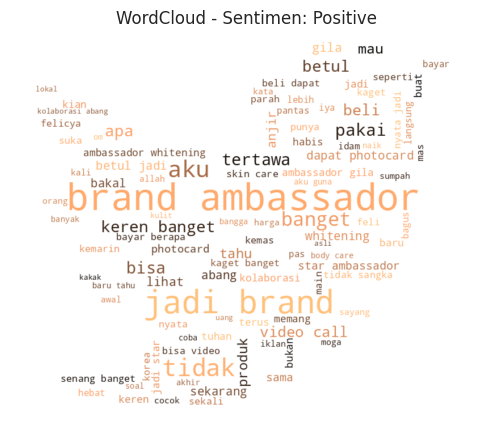

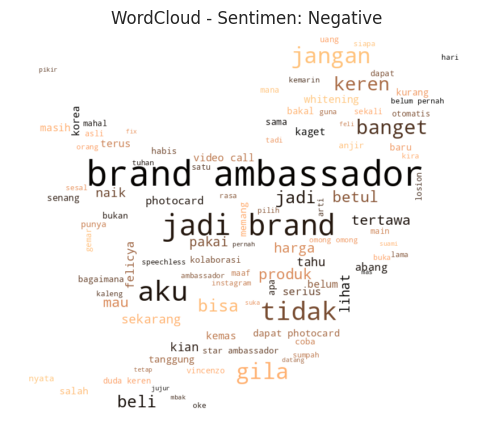

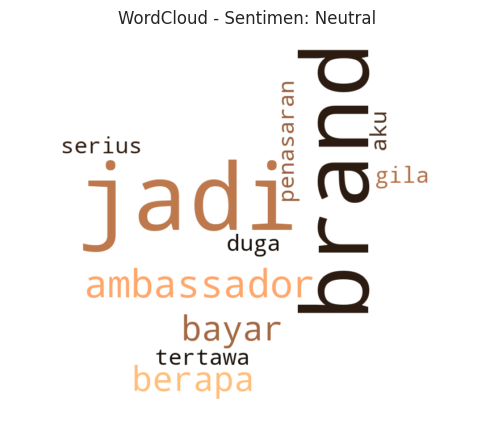

In [83]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

#Data Visualization for positive sentiment----
# Fungsi untuk membuat WordCloud berdasarkan kelas sentimen
def combine_text(dataframe, sentiment):
    combined_text = []
    for row in dataframe[dataframe['label_sentimen'] == sentiment]['text_stemmed']:
        combined_text.extend(row)
    return ' '.join([item for sublist in combined_text for item in sublist if item not in words_to_remove])

# Fungsi untuk membuat WordCloud berdasarkan kelas sentimen
def create_wordcloud(dataframe, sentiment, words_to_remove=None):
    text = combine_text(dataframe, sentiment)
    mask = np.array(Image.open('twitter_hd.png'))
    wordcloud = WordCloud(width=800, height=400, mask=mask, background_color='white', colormap='copper', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud - Sentimen: {sentiment}')
    plt.axis('off')
    plt.savefig("wordcloud sentiwordnet.png", format="png")

    # Menyimpan hasil WordCloud ke dalam file gambar
    filename = f'WordCloud-sentiwordnet_{sentiment}.png'
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# Kata-kata yang ingin dihapus
words_to_remove = set(['scarlett', 'joongki','song'])

# Memanggil fungsi create_wordcloud untuk setiap kelas sentimen
for sentiment in df['label_sentimen'].unique():
    create_wordcloud(df, sentiment, words_to_remove)

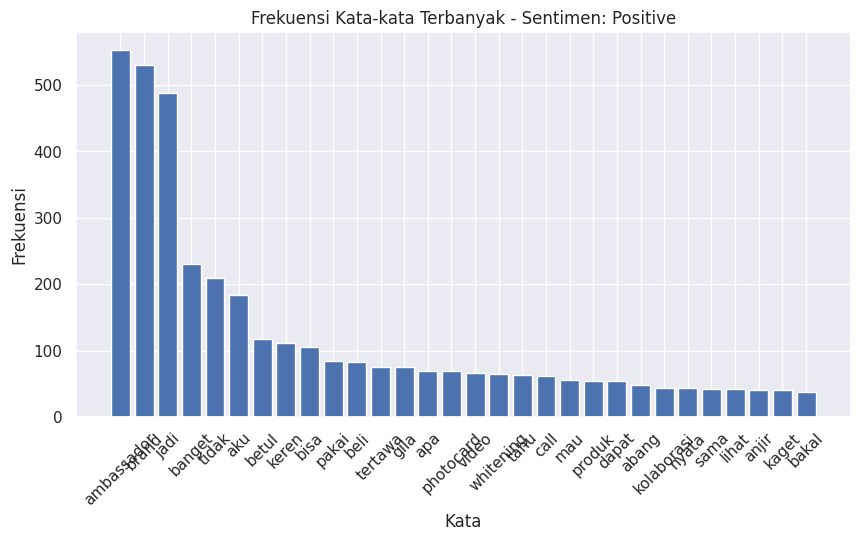

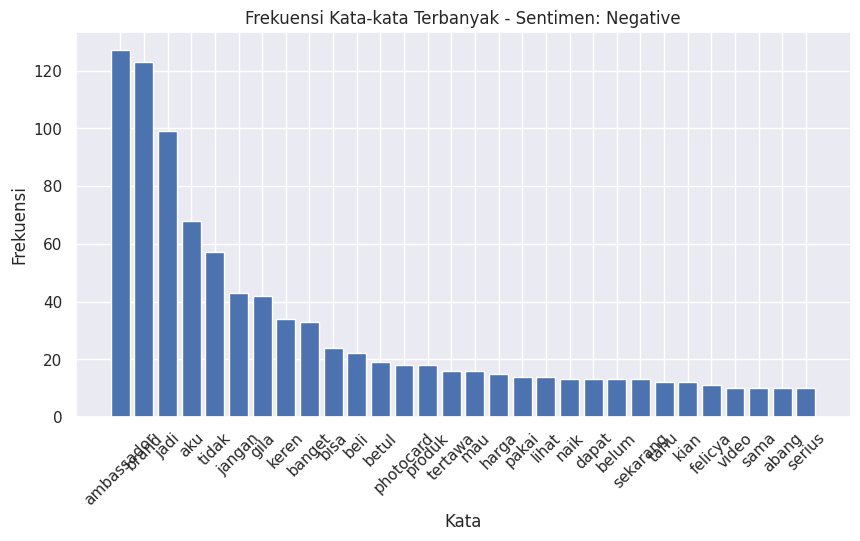

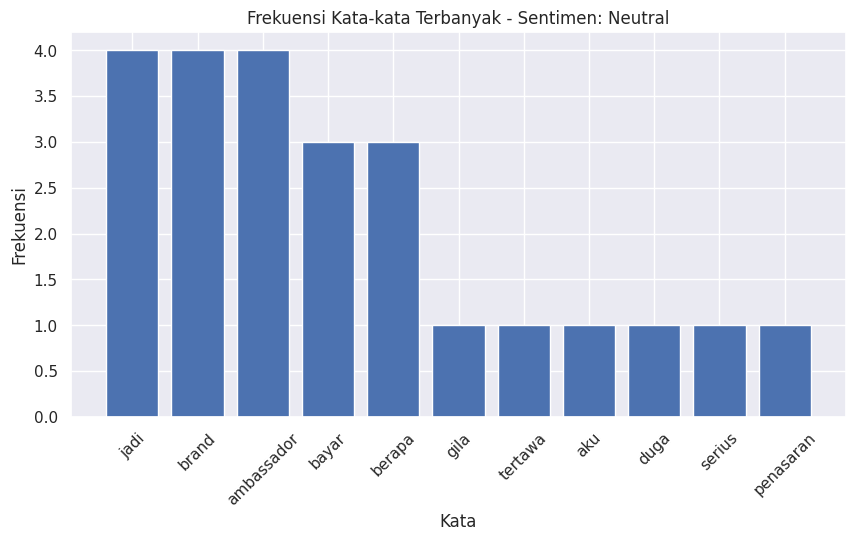

In [84]:
from collections import Counter

def combine_text(dataframe, sentiment):
    combined_text = []
    for row in dataframe[dataframe['label_sentimen'] == sentiment]['text_stemmed']:
        combined_text.extend(row)
    return combined_text

# Fungsi untuk menghitung frekuensi setiap kata dalam teks
def word_frequency(text):
    word_counts = Counter([item for sublist in text for item in sublist if item not in words_to_remove])
    return word_counts

# Fungsi untuk membuat grafik frekuensi kata-kata
def plot_word_frequency(dataframe, sentiment, word_to_remove):
    text = combine_text(dataframe, sentiment)
    word_counts = word_frequency(text)

    # Mengambil 10 kata dengan frekuensi tertinggi
    common_words = word_counts.most_common(30)
    words, counts = zip(*common_words)

    # Membuat grafik
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f'Frekuensi Kata-kata Terbanyak - Sentimen: {sentiment}')
    plt.xlabel('Kata')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.savefig("frekuensi kata sentiwordnet.png", format="png")

    # Menyimpan hasil WordCloud ke dalam file gambar
    filename = f'Frekuensi_{sentiment}.png'
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# Kata-kata yang ingin dihapus
words_to_remove = set(['scarlett', 'joongki','song'])

# Memanggil fungsi plot_word_frequency untuk setiap kelas sentimen
for sentiment in df['label_sentimen'].unique():
    plot_word_frequency(df, sentiment, words_to_remove)

###### Menyimpan hasil *Lexicon-based*

In [ ]:
a = pd.DataFrame([df['text_stemmed'],df['translate_finish'],df['score'],df['score_label'],df['label_sentimen']]).transpose().head(1000)
a.to_excel('hasil sentiwordnet.xlsx')

#### **Uji Coba dengan Hasil SentiWordNet**

##### **TF-IDF**
Melakukan transformasi teks menjadi angka

##### **Membagi data sebelum TF-IDF**



In [85]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df['text_stemmed'], df['label_sentimen'], test_size=0.20, random_state=557)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

def calculate_tfidf(train_data, test_data):
    # Count Vectorizer
    vect = CountVectorizer()

    # Melakukan fit transform pada data training
    train_term_counts = vect.fit_transform(train_data.astype('string'))

    # Menghitung jumlah kemunculan kata pada data training
    train_term_frequencies = train_term_counts.sum(axis=0)

    # Hitung total kata dalam data training
    total_words = train_term_frequencies.sum()

    # Inisialisasi IDF dictionary
    idf_dict = {}

    # Hitung IDF untuk setiap kata
    for term, index in vect.vocabulary_.items():
        df = train_term_counts[:, index].count_nonzero()
        idf = np.log(total_words / df)
        idf_dict[term] = idf

    # Melakukan perhitungan TF-IDF pada data training
    train_tfidf_matrix = train_term_counts.multiply(np.log(total_words / train_term_frequencies))

    # Membuat dataframe hasil TF-IDF untuk data training
    df_tfidf_train = pd.DataFrame(train_tfidf_matrix.toarray(), columns=vect.get_feature_names_out())
    df_tfidf_train.to_excel('tf-idf_train.xlsx')

    # Transformasi data testing dengan CountVectorizer yang telah di-fit pada data training
    test_term_counts = vect.transform(test_data.astype('string'))

    # Melakukan perhitungan TF-IDF pada data testing
    test_tfidf_matrix = test_term_counts.multiply(np.log(total_words / train_term_frequencies))

    # Membuat dataframe hasil TF-IDF untuk data testing
    df_tfidf_test = pd.DataFrame(test_tfidf_matrix.toarray(), columns=vect.get_feature_names_out())
    df_tfidf_test.to_excel('tf-idf_test.xlsx')

    return df_tfidf_train, df_tfidf_test

df_tfidf_train, df_tfidf_test = calculate_tfidf(train_X, test_X)

##### **Klasifikasi dengan *Multinomial Naive Bayes***

###### **Penentuan Model *Multinomial Naive Bayes Classifier***

Membuat Model

In [87]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0)

clf.fit(df_tfidf_train, train_y)

MultinomialNB()

Model prediksi

In [111]:
np.exp(clf.class_log_prior_)

array([0.185  , 0.00375, 0.81125])

In [112]:
vect = CountVectorizer()
latih = vect.fit_transform(train_X.astype('string'))
tes = vect.transform(test_X.astype('string'))
print("Kelas yang mungkin:", clf.classes_)
print("Prior Probability:", np.exp(clf.class_log_prior_))
print("Jumlah Kelas:", len(clf.classes_))
predik = clf.predict_proba(df_tfidf_test)
hasil = pd.DataFrame(predik, columns=clf.classes_, index=test_X.index)
hasil['class']=y_pred
hasil['aktual']=test_y
hasil['tweet']=test_X
hasil.to_excel('posteriornya data testing.xlsx')
hasil

Kelas yang mungkin: ['Negative' 'Neutral' 'Positive']
Prior Probability: [0.185   0.00375 0.81125]
Jumlah Kelas: 3


,Negative,Neutral,Positive,class,aktual,tweet
956,5.179120e-08,1.250946e-21,1.000000,Positive,Positive,"[[aku, beli, scarlett, photocard, song, joongk..."
194,6.129139e-01,6.896432e-13,0.387086,Negative,Positive,"[[bos, scarlett, video, call, song, joongki]]"
329,1.570257e-05,2.786513e-23,0.999984,Positive,Positive,"[[apa, song, joongki, jadi, brand, ambassador,..."
876,1.427712e-58,1.533980e-59,1.000000,Positive,Positive,"[[kakak, me, adik, mau, beli, scarlett, tidak]..."
930,9.992741e-01,2.510627e-41,0.000726,Negative,Positive,"[[betul, buat, moodbooster, kemarin, pagi, pak..."
...,...,...,...,...,...,...
887,4.779900e-26,2.478271e-55,1.000000,Positive,Positive,"[[iya, aku, sendiri, pakai, body, care, scarle..."
295,1.935561e-05,3.806690e-19,0.999981,Positive,Positive,"[[scarlett, whitening, kerja, sama, song, joon..."
425,3.659384e-03,3.298447e-18,0.996341,Positive,Positive,"[[keren, banget, scarlett, song, joongki]]"
41,1.083519e-02,2.627543e-18,0.989165,Positive,Positive,"[[seperti, scarlett, sama, joongki, bukan, son..."


In [88]:
y_pred = clf.predict(df_tfidf_test)

###### *Classification Report*

In [89]:
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
from sklearn import metrics

print("Model applied on testing data set")
class_names = clf.classes_
print("***********Classification Report***********")

classreport = classification_report(test_y, y_pred, labels=class_names, zero_division=0, output_dict=True, digits=3)
pd.DataFrame(classreport).transpose().to_excel('classification report.xlsx')
print(metrics.classification_report(test_y, y_pred, labels=class_names, zero_division=0, digits=4))

Model applied on testing data set
***********Classification Report***********
              precision    recall  f1-score   support

    Negative     0.4324    0.5161    0.4706        31
     Neutral     0.0000    0.0000    0.0000         3
    Positive     0.8896    0.8735    0.8815       166

    accuracy                         0.8050       200
   macro avg     0.4407    0.4632    0.4507       200
weighted avg     0.8054    0.8050    0.8046       200



*Confusion Matrix*

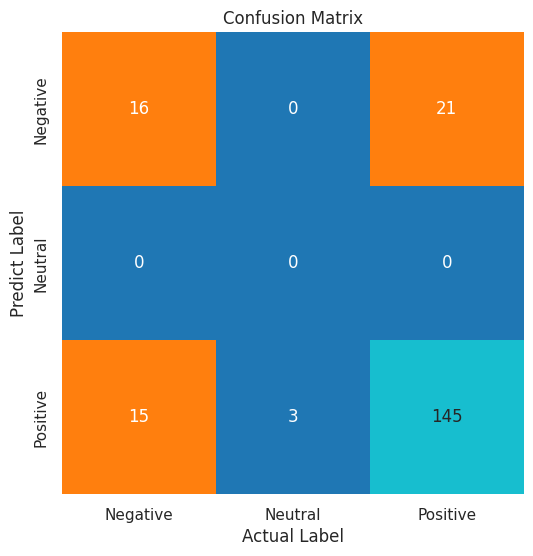

In [92]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(df_tfidf_test)
cm = confusion_matrix(y_pred, test_y)

#Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, square=True, annot=True, cmap='tab10', fmt="g", cbar=False, xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Predict Label')
plt.xlabel('Actual Label')
plt.savefig("confusion matrix.png", format="png")
plt.show()

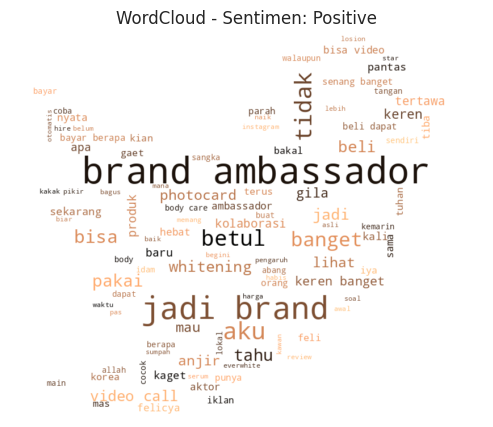

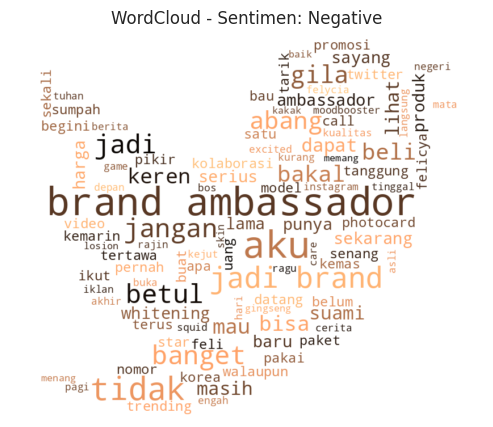

In [94]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

#Data Visualization for positive sentiment----
# Fungsi untuk membuat WordCloud berdasarkan kelas sentimen
def combine_text(dataframe, sentiment):
    combined_text = []
    for row in dataframe[dataframe['class'] == sentiment]['tweet']:
        combined_text.extend(row)
    return ' '.join([item for sublist in combined_text for item in sublist if item not in words_to_remove])

# Fungsi untuk membuat WordCloud berdasarkan kelas sentimen
def create_wordcloud(dataframe, sentiment, word_to_remove):
    text = combine_text(dataframe, sentiment)
    mask = np.array(Image.open('twitter_hd.png'))
    wordcloud = WordCloud(width=800, height=400, mask=mask, background_color='white', colormap='copper', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud - Sentimen: {sentiment}')
    plt.axis('off')

    # Menyimpan hasil WordCloud ke dalam file gambar
    filename = f'WordCloud_{sentiment}.png'
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# Kata-kata yang ingin dihapus
words_to_remove = set(['scarlett', 'joongki','song'])

# Memanggil fungsi create_wordcloud untuk setiap kelas sentimen
for sentiment in hasil['class'].unique():
    create_wordcloud(hasil, sentiment, words_to_remove)

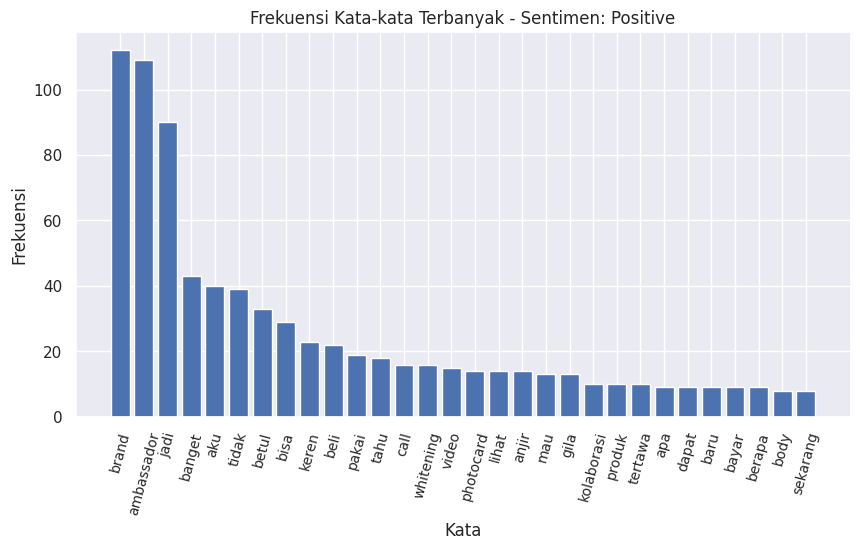

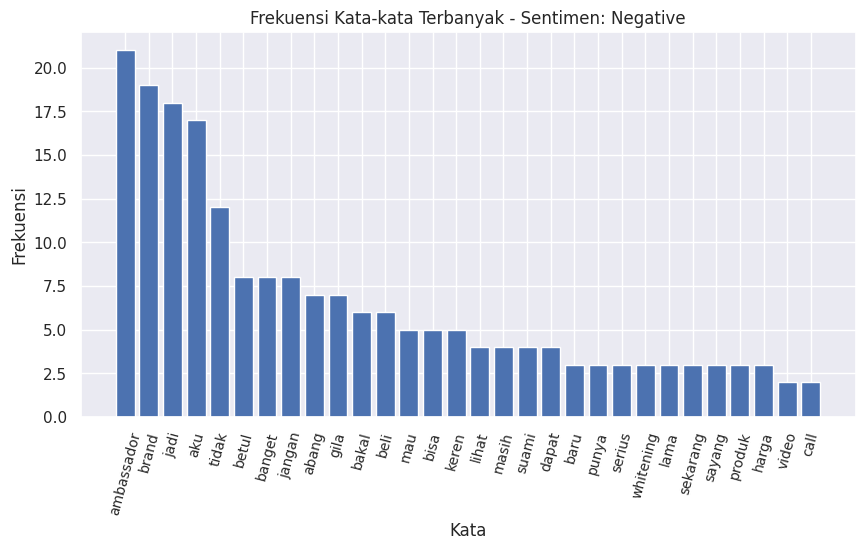

In [110]:
from collections import Counter

def combine_text(dataframe, sentiment):
    combined_text = []
    for row in dataframe[dataframe['class'] == sentiment]['tweet']:
        combined_text.extend(row)
    return combined_text

# Fungsi untuk menghitung frekuensi setiap kata dalam teks
def word_frequency(text):
    word_counts = Counter([item for sublist in text for item in sublist if item not in words_to_remove])
    return word_counts

# Fungsi untuk membuat grafik frekuensi kata-kata
def plot_word_frequency(dataframe, sentiment, words_to_remove=None):
    text = combine_text(dataframe, sentiment)

    # Hapus kata-kata yang tidak diinginkan jika diberikan
    if words_to_remove:
        text = [word for word in text if word not in words_to_remove]

    word_counts = word_frequency(text)

    # Mengambil 10 kata dengan frekuensi tertinggi
    common_words = word_counts.most_common(30)
    words, counts = zip(*common_words)

    # Membuat grafik
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f'Frekuensi Kata-kata Terbanyak - Sentimen: {sentiment}')
    plt.xlabel('Kata')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=75, fontsize=10)
    plt.savefig("frekuensi kata data testing.png", format="png")
    plt.savefig("frekuensi kata data testing.png", format="png")
    plt.show()

# Kata-kata yang ingin dihapus
words_to_remove = ['scarlett', 'joongki','song']

# Memanggil fungsi plot_word_frequency untuk setiap kelas sentimen
for sentiment in hasil['class'].unique():
    plot_word_frequency(hasil, sentiment, words_to_remove)